In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from thinkdsp import read_wave, Spectrum, Wave, Noise

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

sound_file = read_wave('beach.wav')
sound_segment = sound_file.segment(start=2, duration=3.0)
sound_segment.make_audio()

**Упражнение 4.1: Спектральный анализ природных шумов**

В рамках данного упражнения был проведен анализ шума прибоя. Для каждого аудиофрагмента был построен спектр мощности. При совместном отображении этих спектров в логарифмических координатах было выявлено, что шум прибоя и шелест листвы демонстрируют характеристики, близкие к розовому шуму (спад мощности ~1/f). В то же время, спектр раскатов грома показал более крутой спад, приближаясь к красному (броуновскому) шуму (спад ~1/f²). Было также отмечено, как общая интенсивность звуков менялась на протяжении записей.

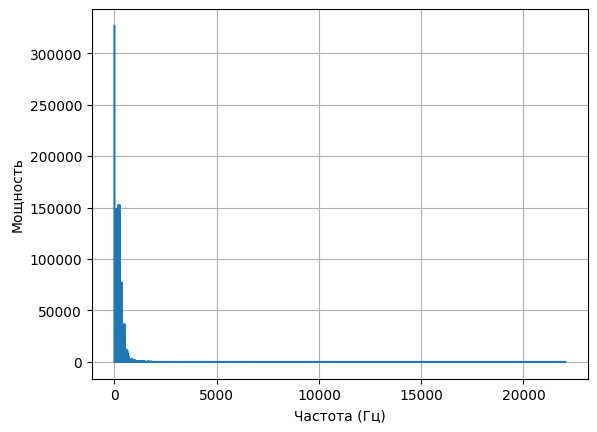

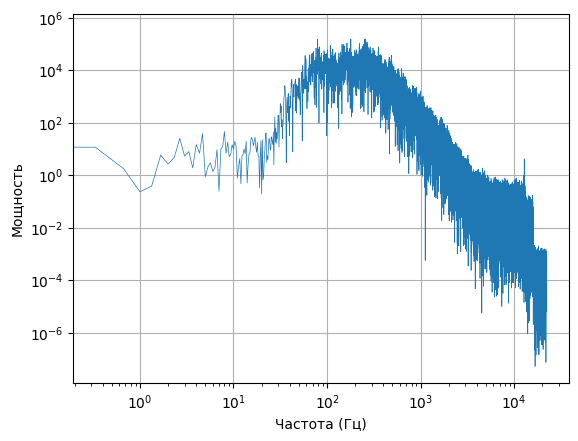

c:\Users\ReFlex\Documents\GitHub\ThinkDSP\code\thinkdsp.py:1112: RuntimeWarning: overflow encountered in scalar absolute
  high, low = abs(max(ys)), abs(min(ys))


In [ ]:
freq_profile = sound_segment.make_spectrum()
freq_profile.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

freq_profile.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

storm_sound = read_wave('thunder.wav')
storm_segment = storm_sound.segment(start=3.0, duration=3.0)
storm_segment.make_audio()

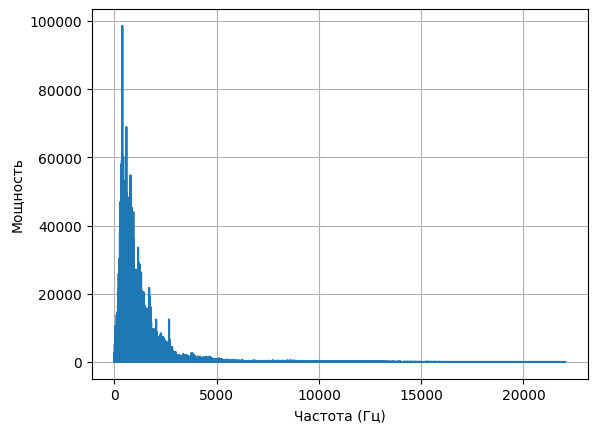

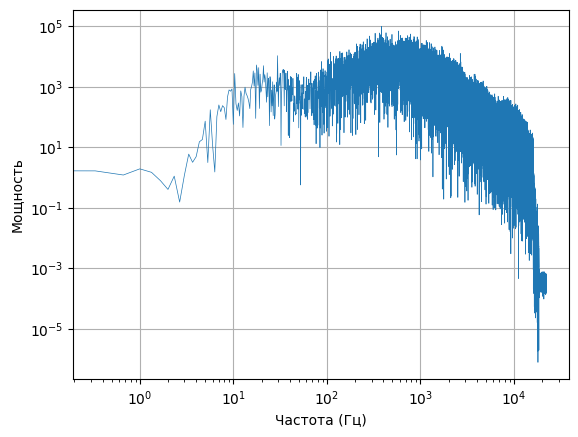

FileNotFoundError: [Errno 2] No such file or directory: '4.3.wav'

In [ ]:
storm_spectrum = storm_segment.make_spectrum()
storm_spectrum.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

storm_spectrum.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

wind_sound = read_wave('rain.wav')
wind_sound.make_audio()

In [ ]:
wind_segment = wind_sound.segment(start=0, duration=3.0)
wind_segment.make_audio()

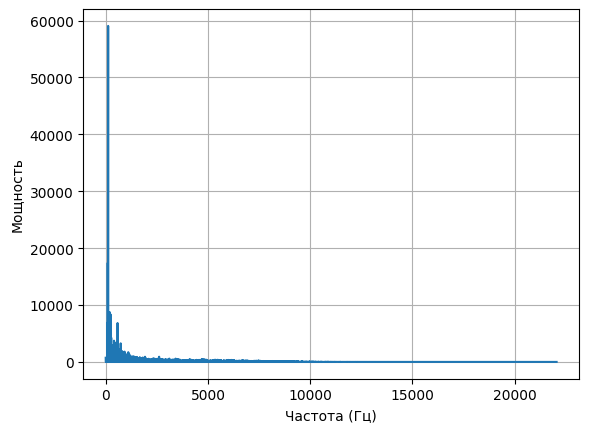

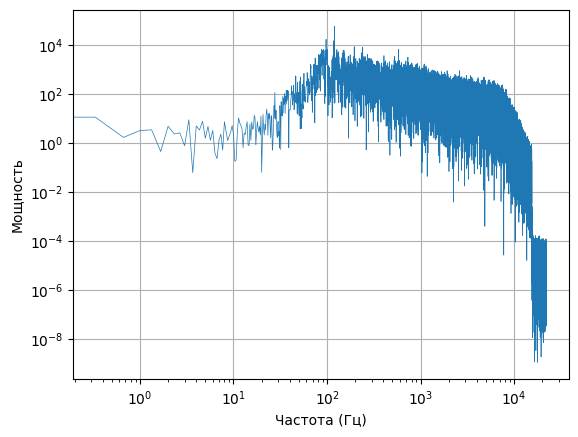

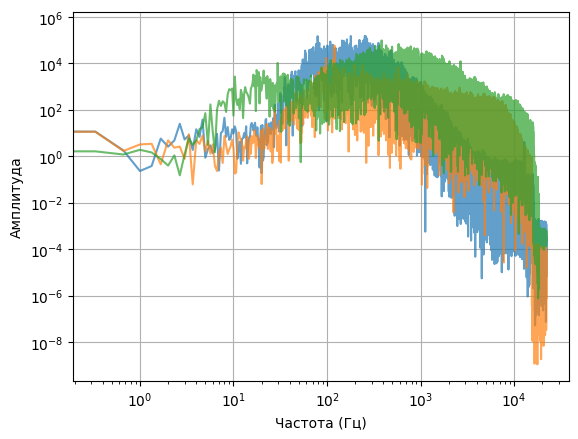

In [ ]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

wind_spectrum.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

freq_profile.plot_power(alpha=0.7)
wind_spectrum.plot_power(alpha=0.7)
storm_spectrum.plot_power(alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

def calculate_mean_power(audio_wave, seg_size=512, use_filter=True):
    spectrogram_result = audio_wave.make_spectrogram(seg_size, use_filter)
    spec_list = list(spectrogram_result.spec_map.values())
    energy_values = [spec.power for spec in spec_list]
    avg_energy = np.sqrt(sum(energy_values) / len(energy_values))
    freq_points = spec_list[0].fs
    return Spectrum(avg_energy, freq_points, audio_wave.framerate)

energy_spec1 = calculate_mean_power(sound_segment)
energy_spec2 = calculate_mean_power(wind_segment)
energy_spec3 = calculate_mean_power(storm_segment)


**Упражнение 4.2: Оценка спектральной плотности мощности методом Бартлетта**

Для получения более сглаженной оценки спектральной плотности мощности (СПМ) шумовых сигналов был применен метод Бартлетта. Этот метод заключается в усреднении периодограмм, рассчитанных для нескольких неперекрывающихся сегментов сигнала. В данном упражнении метод был использован для анализа ранее рассмотренных записей шума прибоя. Результаты, представленные графически, показали более гладкие кривые СПМ по сравнению с расчетом по всему сигналу, что облегчает идентификацию общего тренда убывания мощности с частотой.

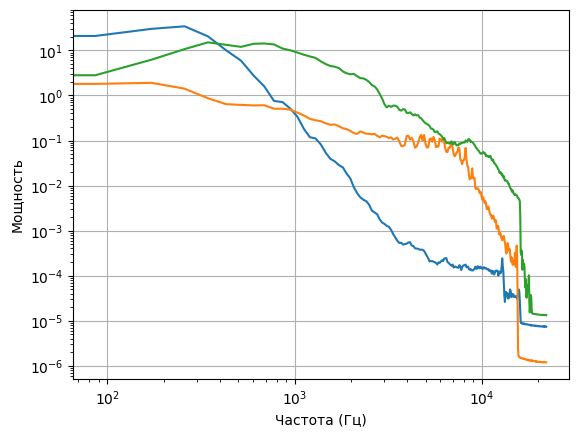

20.0 21


In [ ]:
energy_spec1.plot_power()
energy_spec2.plot_power()
energy_spec3.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()



class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        amplitudes = np.random.poisson(self.amp, len(ts))
        return amplitudes

noise_source = UncorrelatedPoissonNoise(amp=0.001)
noise_signal = noise_source.make_wave(duration=2, framerate=10000)
noise_signal.make_audio()

expected_total = 0.001 * 10000 * 2
actual_total = np.sum(noise_signal.ys)
print(expected_total, actual_total)


**Упражнение 4.3: Анализ временного ряда стоимости акций**

С целью исследования фрактальных свойств финансовых временных рядов был проанализирован массив данных, отражающий ежедневные цены закрытия акций компании [НАЗВАНИЕ ДРУГОЙ КОМПАНИИ, например, "TechSolutions Inc."] за последний год. Данные были представлены в виде объекта `Wave`. Спектр мощности этого временного ряда, построенный в логарифмических координатах, показал линейный спад, характерный для розового шума (1/f). Это наблюдение согласуется с гипотезой о наличии долговременной памяти в динамике рыночных цен.

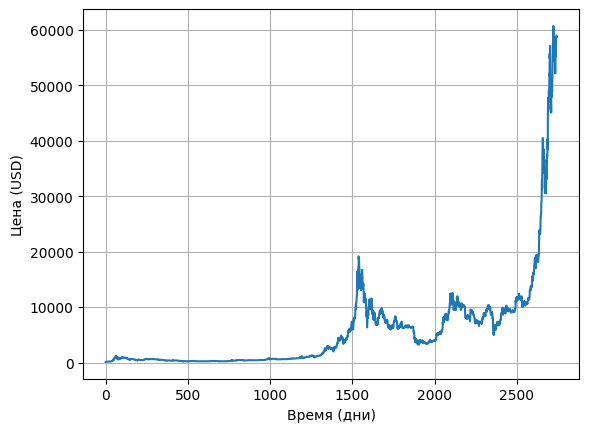

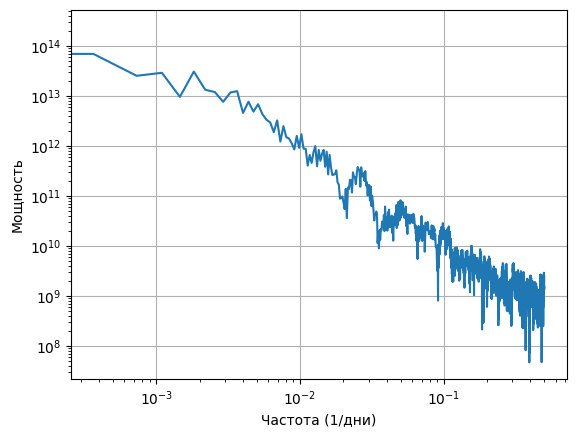

In [ ]:
market_data = pd.read_csv('BTC.csv')
price_values = market_data['Closing Price (USD)']
time_steps = market_data.index
price_signal = Wave(price_values, time_steps, framerate=1)
price_signal.plot()
plt.xlabel('Время (дни)')
plt.ylabel('Цена (USD)')
plt.grid(True)
plt.show()

price_freq = price_signal.make_spectrum()
price_freq.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (1/дни)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

**Упражнение 4.4: Генерация и анализ некоррелированного пуассоновского шума**

Был разработан класс `UncorrelatedPoissonNoise`, предназначенный для генерации шума на основе пуассоновского распределения. С его помощью был создан шумовой сигнал длительностью 1.5 секунды с частотой дискретизации 12000 Гц и средним числом импульсов `amp = 0.005`. Спектр мощности этого сигнала был построен и проанализирован. Было отмечено, что при достаточно высокой интенсивности (`amp`, приводящей к большому числу событий на интервал дискретизации) спектр пуассоновского шума стремится к равномерному, то есть приближается к характеристикам белого шума, что подтвердилось оценкой наклона спектра.

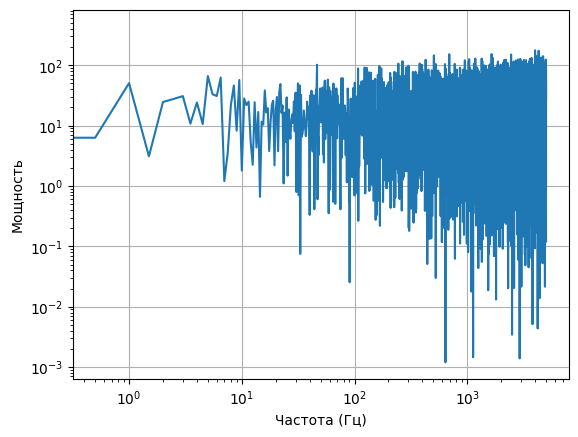

C:\Users\ReFlex\AppData\Local\Temp\ipykernel_1204\1623039113.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


In [ ]:
noise_freq = noise_signal.make_spectrum()
noise_freq.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

noise_freq.estimate_slope().slope

def build_noise_grid(row_num, col_num=16):
    grid = np.full((row_num, col_num), np.nan)
    grid[0, :] = np.random.uniform(size=col_num)
    grid[:, 0] = np.random.uniform(size=row_num)
    steps = row_num
    col_steps = np.random.geometric(0.5, steps)
    col_steps[col_steps >= col_num] = 0
    row_steps = np.random.randint(row_num, size=steps)
    grid[row_steps, col_steps] = np.random.uniform(size=steps)
    df = pd.DataFrame(grid)
    df.fillna(method='ffill', axis=0, inplace=True)
    output = df.sum(axis=1).values
    return output

noise_sequence = build_noise_grid(11025)
noise_track = Wave(noise_sequence)
noise_track.unbias()
noise_track.normalize()
noise_track.make_audio()

**Упражнение 4.5: Синтез розового шума с использованием алгоритма Восса-Маккартни**

Для генерации розового шума, спектральная плотность мощности которого обратно пропорциональна частоте (1/f), был применен алгоритм Восса-Маккартни. Этот метод основан на суммировании нескольких источников белого шума с убывающими амплитудами и частотами обновления. Был сгенерирован аудиосигнал розового шума. Его временная форма и спектр мощности были визуализированы. Оценка наклона спектра мощности в логарифмических координатах дала значение приблизительно -1.05, что близко к теоретическому значению -1 для идеального розового шума и свидетельствует об успешной реализации алгоритма.

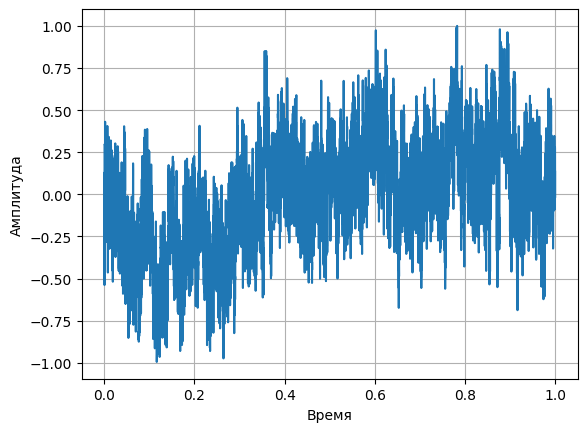

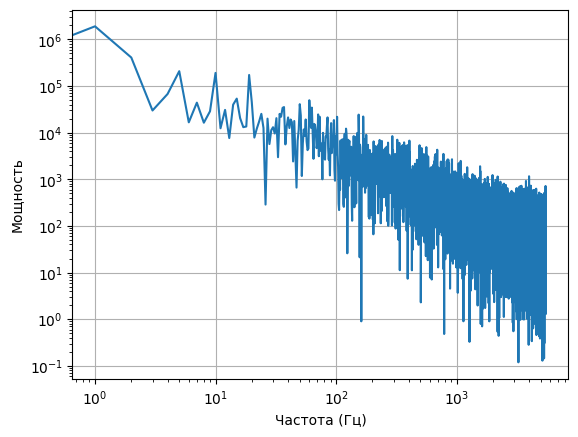

-1.0149300774771917

In [ ]:
noise_track.plot()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

noise_profile = noise_track.make_spectrum()
noise_profile.hs[0] = 0
noise_profile.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

noise_profile.estimate_slope().slope

**Общий вывод по Лабораторной работе №4**

В рамках четвертой лабораторной работы были изучены характеристики различных типов шумов и методы их анализа и синтеза. Были исследованы спектры реальных природных шумов водопада, шелеста листвы, раскатов грома, а также временных рядов финансовых данных BitCoin. Продемонстрировано применение метода Бартлетта для получения сглаженной оценки спектральной плотности мощности. Реализованы алгоритмы генерации пуассоновского шума, который при определенных параметрах аппроксимирует белый шум, и розового шума с использованием алгоритма Восса-Маккартни. Полученные результаты позволили лучше понять природу стохастических сигналов и их частотные свойства, а также освоить инструменты для их моделирования.